<a href="https://colab.research.google.com/github/GaganBP/Netflix_Movie_Analysis/blob/main/Netflix_Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()


Saving mymoviedb.csv to mymoviedb.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [7]:
# to know count of rows and columns
df.shape

(9827, 9)

In [8]:
df.size

88443

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary**

* The DataFrame consists of 9 columns and 9,837 rows.
* The dataset does not contain any missing (NaN) values or duplicate entries.
* The release_date column has a data type of object and needs to be converted to datetime to extract only the year.
* The columns overview, original_language, and poster_url are not useful for this analysis and should be removed.
* There are noticeable outliers in the popularity column.
* The vote_average column should be categorized for better analysis.
* The genre column contains comma-separated values and white spaces, which need to be handled and converted into a categorical format.
























In [13]:
# to change date format from object to date
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)


datetime64[ns]


In [14]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes


dtype('int32')

In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**To Drop Columns which are not necessary**

In [16]:
#to remove Overview ,Original_Language, Poster_Url column

cols =['Overview','Original_Language','Poster_Url']


In [17]:
df.drop(cols,axis =1,inplace=True)

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [19]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


**Categorizing Vote_average Column**

We  would cut the vote_average values and make 4 categories: popular , average , below_avg ,not_popular to describe it more using categorize_col() function provided above.


In [20]:
# We would cut the vote_average values and make 4 categories: popular , average , below_avg ,not_popular to describe it more using categorize_col() function provided above.
"""
def categorize_col(value):
    if value >= 8:
        return 'popular'
    elif value >= 6:
        return 'average'
    elif value >= 4:
        return 'below_avg'
    else:
        return 'not_popular'
"""
def categorize_col(df, col, labels):
    # Calculate bin edges using descriptive statistics (min, 25%, 50%, 75%, max)
    edges = [df[col].describe()['min'],     # Minimum value of the column
             df[col].describe()['25%'],     # 1st quartile (25th percentile)
             df[col].describe()['50%'],     # Median (50th percentile)
             df[col].describe()['75%'],     # 3rd quartile (75th percentile)
             df[col].describe()['max']]     # Maximum value of the column

    # Cut the column into bins using the edges and assign labels to each bin
    # 'duplicates="drop"' removes any duplicated bin edges (if min=25%, etc.)
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')

    # Return the modified DataFrame with the categorized column
    return df


In [21]:
# We're calling the categorize_col function to classify the 'Vote_Average' column
# into four categories using the provided labels.
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)

# Now, let's check the unique category values assigned in the 'Vote_Average' column
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [23]:
df['Genre'].describe()


,Genre
count,9827
unique,2337
top,Drama
freq,466


In [24]:
# to check howmany movies comes under popular,below_avg,av erage,not_popular
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [25]:
df.dropna(inplace = True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


**We'll split the genres into a list and then explode the DataFrame so that each row contains only one genre per movie.**

In [27]:
# We'll split the genres into a list and then explode the DataFrame so that each row contains only one genre per movie.
df['Genre'] = df['Genre'].str.split(',')

# Explode the DataFrame so each genre in the list gets its own row
# This duplicates other columns accordingly for each genre
df = df.explode('Genre').reset_index(drop = True)

# Display the first few rows of the transformed DataFrame
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [28]:
# First, strip whitespace from the Genre column
df['Genre'] = df['Genre'].str.strip()

# Now convert to category
df['Genre'] = df['Genre'].astype('category')

# Check the unique categories again
print(df['Genre'].cat.categories)
print(df.nunique())

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')
Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [30]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


**Data Visualization**

In [32]:
sns.set_style('whitegrid')

**What is the most frequent genre of movies released on Netflix?**

In [33]:
#to search is the most frequent genre of movies released on Netflix
df['Genre'].describe()


,Genre
count,25552
unique,19
top,Drama
freq,3715


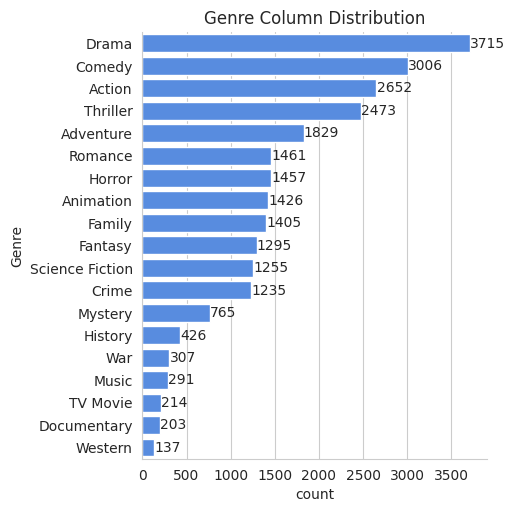

In [34]:
# Create a count plot for the 'Genre' column, ordered by frequency
plot = sns.catplot(y='Genre', data=df, kind='count',
                   order=df['Genre'].value_counts().index,
                   color='#4287f5')

# Set the title for the plot
plt.title('Genre Column Distribution')

# Add value labels to each bar to show the count of movies per genre
for p in plot.ax.patches:
    plot.ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
                 int(p.get_width()), va='center')

# Display the final plot
plt.show()


**Which has highest votes in Vote avg column**

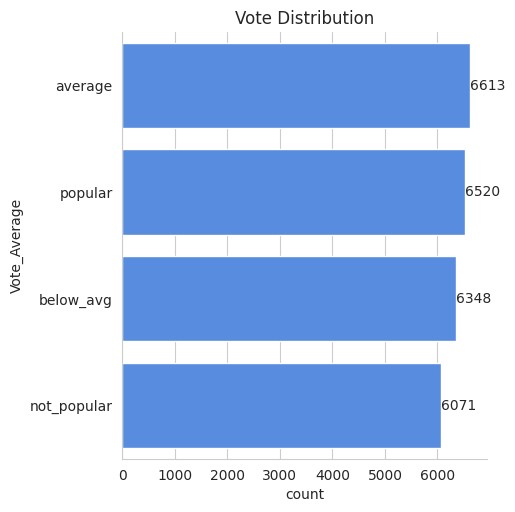

In [35]:
# Graph to show which value occurs most frequently in the 'Vote_Average' column
plot = sns.catplot(y='Vote_Average', data=df, kind='count',
                   order=df['Vote_Average'].value_counts().index,
                   color='#4287f5')

# Set the title of the plot
plt.title('Vote Distribution')

# Add value labels to each bar to show exact counts
for p in plot.ax.patches:
    plot.ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
                 int(p.get_width()), va='center')

# Display the plot
plt.show()


**What movie got the highest popularity and lowest popularity?What is its 'genre'?**

In [36]:

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [37]:
# to find  movie got the highest popularity?What is its 'genre'?

df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [38]:
#less popular movie and its genere
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


**Which year has most filmed movies?**

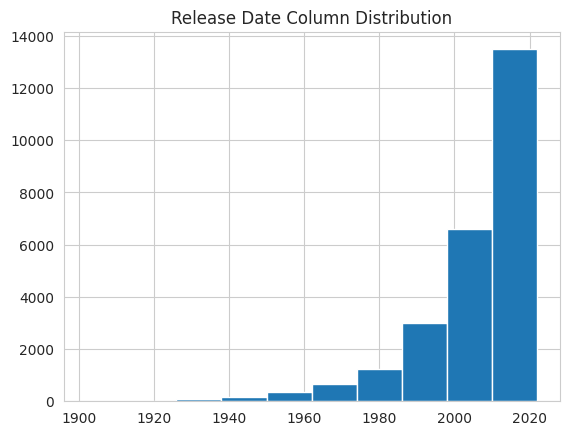

In [40]:
# to find which year has most filmed movies in graphical view
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

# **Conclusion**

**Q1: What is the most frequent genre in the dataset?**

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

**Q2: What genres has highest votes?**

We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

**Q3: What movie got the highest popularity? what's its genre?**

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

**Q3: What movie got the lowest popularity? what's its genre?**

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.

**Q4: Which year has the most filmed movies?**

Year 2020 has the highest filming rate in our dataset.
